In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
tcri = pd.read_csv('tcri.csv')

In [43]:
tcri.shape 

(14142, 5)

In [44]:
tcri.describe(include = 'all')

,coid,mdate,tcri,scr,xcdt
count,14142.000000,14142,14142,14126.000000,226
unique,NaN,11,7,NaN,5
top,NaN,2023-12-01 00:00:00+00:00,6,NaN,上市前
freq,NaN,1387,5091,NaN,112
mean,4475.157969,NaN,NaN,403.702747,NaN
std,2195.149125,NaN,NaN,224.010612,NaN
min,1103.000000,NaN,NaN,-1465.000000,NaN
25%,2601.000000,NaN,NaN,310.000000,NaN
50%,4131.000000,NaN,NaN,424.000000,NaN
75%,6213.000000,NaN,NaN,544.000000,NaN


In [45]:
tcri.head()

,coid,mdate,tcri,scr,xcdt
0,1103,2014-12-01 00:00:00+00:00,6,400.0,NaN
1,1103,2015-12-01 00:00:00+00:00,6,432.0,NaN
2,1103,2016-12-01 00:00:00+00:00,6,371.0,NaN
3,1103,2017-12-01 00:00:00+00:00,6,330.0,NaN
4,1103,2018-12-01 00:00:00+00:00,6,331.0,NaN


In [46]:
tcri['mdate'] = pd.to_datetime(tcri['mdate']).dt.year
tcri

,coid,mdate,tcri,scr,xcdt
0,1103,2014,6,400.0,NaN
1,1103,2015,6,432.0,NaN
2,1103,2016,6,371.0,NaN
3,1103,2017,6,330.0,NaN
4,1103,2018,6,331.0,NaN
...,...,...,...,...,...
14137,9962,2020,6,376.0,NaN
14138,9962,2021,6,418.0,NaN
14139,9962,2022,6,599.0,NaN
14140,9962,2023,6,494.0,NaN


### 字典

In [47]:
tcri_ = {}
for i in [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]:
    tcri_[i] = tcri[tcri['mdate'] == i]
tcri_[2024]

,coid,mdate,tcri,scr,xcdt
10,1103,2024,6,424.0,NaN
21,1104,2024,5,688.0,NaN
32,1108,2024,6,441.0,NaN
43,1109,2024,5,591.0,NaN
54,1110,2024,6,400.0,NaN
...,...,...,...,...,...
14096,9950,2024,8,347.0,NaN
14108,9955,2024,8,167.0,NaN
14119,9958,2024,5,687.0,NaN
14130,9960,2024,6,488.0,NaN


### sorted

In [48]:
tcri_sorted_ = {}
for i in [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]:
    tcri_sorted_[i] = tcri_[i].sort_values('tcri')
tcri_sorted_[2024]

,coid,mdate,tcri,scr,xcdt
2260,2228,2024,5,589.0,NaN
2488,2356,2024,5,604.0,NaN
2484,2355,2024,5,630.0,NaN
2424,2340,2024,5,250.0,NaN
2406,2337,2024,5,357.0,NaN
...,...,...,...,...,...
4047,2911,2024,D,-748.0,NaN
6412,3593,2024,D,-393.0,NaN
13339,8291,2024,D,-177.0,NaN
7322,4304,2024,D,-1252.0,NaN


In [49]:
tcri_sorted = tcri.sort_values('tcri')
tcri_sorted

,coid,mdate,tcri,scr,xcdt
7837,4568,2022,5,558.0,NaN
11221,6442,2016,5,598.0,NaN
11220,6442,2015,5,592.0,NaN
11219,6442,2014,5,562.0,NaN
8151,4764,2024,5,307.0,NaN
...,...,...,...,...,...
8660,5205,2014,D,204.0,NaN
8661,5205,2015,D,208.0,NaN
8662,5205,2016,D,120.0,NaN
1959,2025,2019,D,16.0,NaN


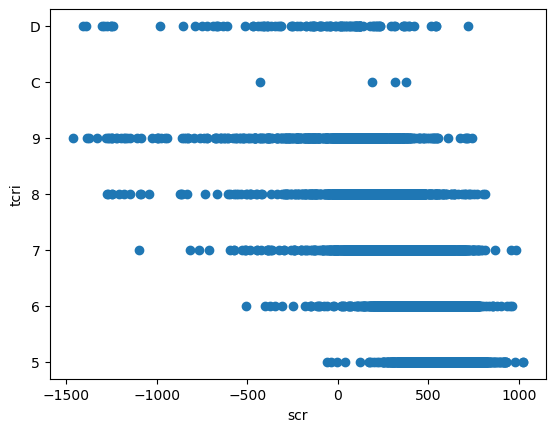

In [50]:
x = tcri_sorted['scr']
y = tcri_sorted['tcri']
plt.scatter(x, y)       
plt.xlabel('scr')
plt.ylabel('tcri')
plt.show()

available: ['coid', 'mdate', 'scr']


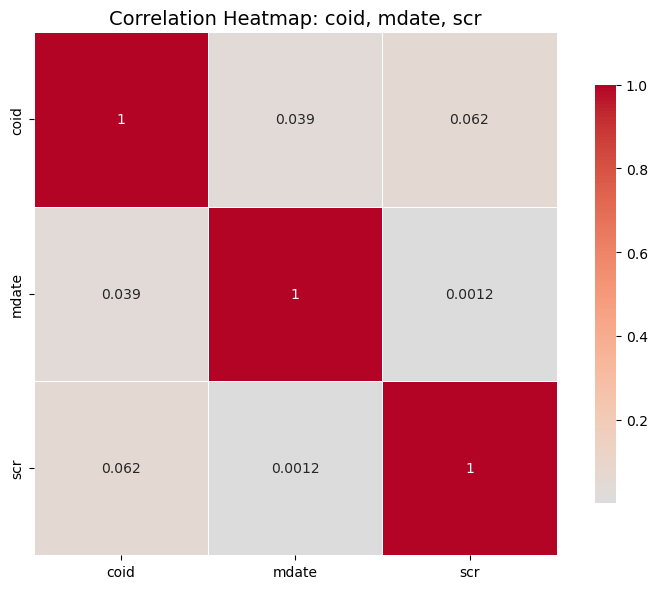

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = tcri.select_dtypes(include=['number']).columns

available_numeric = [col for col in ['coid', 'mdate', 'tcri', 'scr'] if col in numeric_columns]

print(f"available: {available_numeric}")

if available_numeric:
    plt.figure(figsize=(8, 6))
    sns.heatmap(tcri[available_numeric].corr(), 
               annot=True,
               cmap='coolwarm',
               center=0,
               square=True,
               linewidths=0.5,
               cbar_kws={"shrink": 0.8})
    
    plt.title(f'Correlation Heatmap: {", ".join(available_numeric)}', fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("None available")

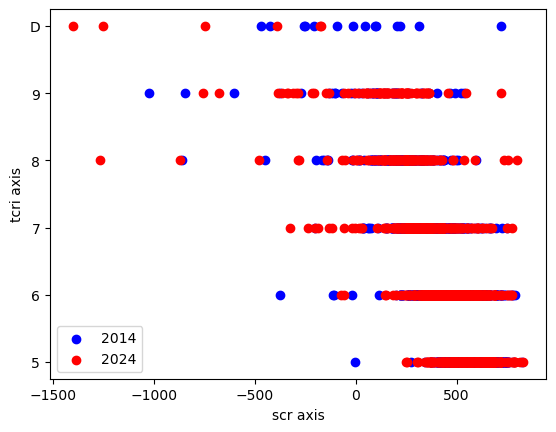

In [52]:
#plt.figure(figsize=(10, 10))
plt.scatter(tcri_sorted_[2014]['scr'], tcri_sorted_[2014]['tcri'], color='blue', label='2014')
plt.scatter(tcri_sorted_[2024]['scr'], tcri_sorted_[2024]['tcri'], color='red', label='2024')
plt.xlabel('scr axis')
plt.ylabel('tcri axis')
plt.legend()
plt.show()

### KEY

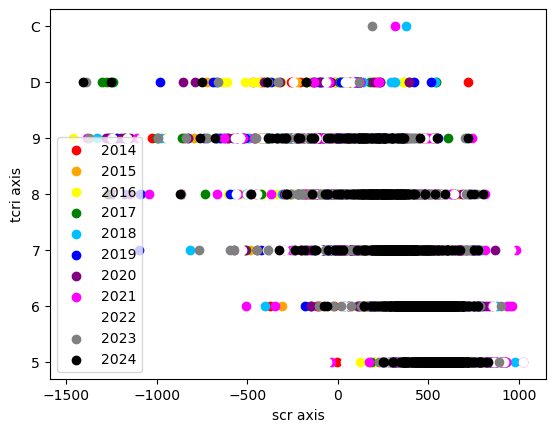

In [57]:
color_mapping = {
    2014: 'red',
    2015: 'orange', 
    2016: 'yellow',
    2017: 'green',
    2018: 'deepskyblue',
    2019: 'blue',
    2020: 'purple',
    2021: 'magenta',
    2022: 'white',
    2023: 'gray',
    2024: 'black'
}

for year in color_mapping.keys():
    tcri_sorted_inloop = tcri_sorted_[year]
    plt.scatter(tcri_sorted_inloop['scr'], tcri_sorted_inloop['tcri'], color=color_mapping[year], label=str(year))
plt.xlabel('scr axis')
plt.ylabel('tcri axis')
plt.legend()
plt.show()

In [25]:
tcri1103 = tcri[tcri['coid'] == 1103]
tcri1103

,coid,mdate,tcri,scr,xcdt
0,1103,2014,6,400.0,NaN
1,1103,2015,6,432.0,NaN
2,1103,2016,6,371.0,NaN
3,1103,2017,6,330.0,NaN
4,1103,2018,6,331.0,NaN
5,1103,2019,6,359.0,NaN
6,1103,2020,6,574.0,NaN
7,1103,2021,6,401.0,NaN
8,1103,2022,6,383.0,NaN
9,1103,2023,6,417.0,NaN


In [30]:
tcri2014_mean = tcri2014['scr'].mean()
tcri2014_mean

416.2529510961214

In [59]:
tcri1104 = tcri[tcri['coid'] == 1104]
tcri1104_mean = tcri1104['scr'].mean()
tcri1104_mean

618.0909090909091

In [60]:
tcri1103 = tcri[tcri['coid'] == 1103]
tcri1103_mean = tcri1103['scr'].mean()
tcri1103_mean

402.0